### Deep Learning Lab - II
### Name: Durva Deshpande
### Batch: A1
### Roll No: 4
### Practical 2

#### Module 2: Bayesian Network - Demo 1: Late to Office

In [2]:
#!pip install pgmpy==0.1.21

In [3]:
#!pip install numpy==1.24.4

In [4]:
#Bayesian Model
from pgmpy.models import BayesianModel

ModuleNotFoundError: No module named 'pgmpy'

### Create an empty Bayesian Network and add nodes, edges to it

In [ ]:
# initialize an empty BN or a model with nodes and edges.
model = BayesianModel()

In [ ]:
#Add nodes and edges to this network:
model.add_nodes_from(['smog', 'traffic'])
model.add_edge('smog', 'traffic')


In [ ]:
model.nodes()

['smog', 'traffic']

In [ ]:
model.edges()

[('smog', 'traffic')]

In [ ]:
model.add_edge('accident', 'traffic')
model.nodes()

['smog', 'traffic', 'accident']

In [ ]:
model.edges()

[('smog', 'traffic'), ('accident', 'traffic')]

### Define CPD's for all the nodes and add them to the network

In [ ]:
from pgmpy.factors.discrete import TabularCPD
cpd_smog = TabularCPD('smog', 2, [[0.4], [0.6]])
cpd_accident = TabularCPD('accident', 2, [[0.2], [0.8]])
cpd_traffic = TabularCPD('traffic', 2,
                                [[0.9, 0.6, 0.7, 0.1],
                                 [0.1, 0.4, 0.3, 0.9]],
                                evidence=['smog', 'accident'],
                                evidence_card=[2, 2])
print("CPD of Smog", cpd_smog, end="\n")
print("CPD of Accident", cpd_accident, end="\n")
print("CPD of Traffic Jam", cpd_traffic, end="\n")


CPD of Smog +--------+-----+
| smog_0 | 0.4 |
+--------+-----+
| smog_1 | 0.6 |
+--------+-----+
CPD of Accident +------------+-----+
| accident_0 | 0.2 |
+------------+-----+
| accident_1 | 0.8 |
+------------+-----+
CPD of Traffic Jam +-----------+------------+------------+------------+------------+
| smog      | smog_0     | smog_0     | smog_1     | smog_1     |
+-----------+------------+------------+------------+------------+
| accident  | accident_0 | accident_1 | accident_0 | accident_1 |
+-----------+------------+------------+------------+------------+
| traffic_0 | 0.9        | 0.6        | 0.7        | 0.1        |
+-----------+------------+------------+------------+------------+
| traffic_1 | 0.1        | 0.4        | 0.3        | 0.9        |
+-----------+------------+------------+------------+------------+


In [ ]:
model.add_cpds(cpd_smog, cpd_accident, cpd_traffic)
model.get_cpds()


[<TabularCPD representing P(smog:2) at 0x7f3057b0f908>,
 <TabularCPD representing P(accident:2) at 0x7f3057b0f8d0>,
 <TabularCPD representing P(traffic:2 | smog:2, accident:2) at 0x7f3057b0f898>]

In [ ]:
model.add_nodes_from(['woke_late',
                               'late_to_office'])
model.add_edges_from(
                   [('woke_late', 'late_to_office'),
                    ('traffic', 'late_to_office')])
cpd_woke_late = TabularCPD('woke_late', 2,
                                          [[0.6], [0.4]])
cpd_late_to_office = TabularCPD(
                               'late_to_office', 2,
                               [[0.9, 0.45, 0.8, 0.1],
                                [0.1, 0.55, 0.2, 0.9]],
                               evidence=['woke_late',
                                         'traffic'],evidence_card=[2, 2])
model.add_cpds(cpd_woke_late, cpd_late_to_office)
model.get_cpds()


[<TabularCPD representing P(smog:2) at 0x7f3057b0f908>,
 <TabularCPD representing P(accident:2) at 0x7f3057b0f8d0>,
 <TabularCPD representing P(traffic:2 | smog:2, accident:2) at 0x7f3057b0f898>,
 <TabularCPD representing P(woke_late:2) at 0x7f3057b0f4a8>,
 <TabularCPD representing P(late_to_office:2 | woke_late:2, traffic:2) at 0x7f3057b0f3c8>]

### Model consistency

In [ ]:
model.check_model()

True

### Local Dependencies

In [ ]:

model.local_independencies('traffic')


(traffic _|_ woke_late | accident, smog)

In [ ]:
model.local_independencies(['woke_late', 'traffic', 'accident','smog', 'late_to_office'])

(woke_late _|_ accident, smog, traffic)
(traffic _|_ woke_late | accident, smog)
(accident _|_ smog, woke_late)
(smog _|_ accident, woke_late)
(late_to_office _|_ accident, smog | traffic, woke_late)

### Graphical Representation of the Network

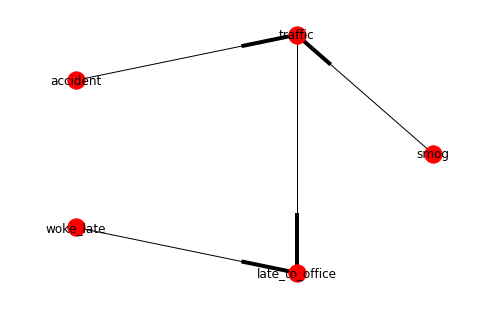

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import networkx as nx
nx.draw_shell(model,with_labels=True)
plt.show()
